### STEP 2: Introducing and Loading the Dataset -- Esther

#### Installing and importing libraries

In [1]:
%pip install scipy
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install scikit-learn
%pip install imbalanced-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# For Downsampling Methods
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss

# For evaluating classifiers
from sklearn import metrics
from collections import Counter


import matplotlib.patches as mpatches
import time

In [3]:
# Load in the dataset from a csv
csv = pd.read_csv('~/Downloads/creditcard.csv')
""
# Convert the data to a pandas dataframe
cc_data = pd.DataFrame(csv)

# Get the shape of the dataframe: (rows, columns)
cc_data.shape

(284807, 31)

In [4]:
# See the first five rows of the dataframe:
cc_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54026,46256.0,-0.730455,1.098625,1.691546,0.768134,0.283482,-0.022784,0.942422,-0.427551,0.605753,...,-0.348206,-0.342970,-0.170828,-0.143431,-0.078739,-0.514428,-0.066005,-0.194384,12.09,0
36372,38507.0,1.233425,-0.143291,0.556354,-0.099381,-0.686861,-0.581780,-0.338371,0.018684,0.519811,...,-0.114109,-0.328530,0.133795,0.100944,0.014447,0.937154,-0.060283,0.004630,5.22,0
215426,140063.0,1.871550,0.330721,-2.566530,0.533803,1.353327,0.293018,-0.006133,0.233519,0.597092,...,0.200056,0.901586,0.069358,-1.690148,-0.058594,0.037250,0.087182,-0.009779,1.00,0
284196,172236.0,2.092824,0.540137,-2.695579,0.595070,0.905425,-1.299002,0.326589,-0.321202,0.600996,...,0.050108,0.345768,-0.131533,-0.997411,0.335041,-0.049384,0.020473,-0.001033,1.00,0
157025,109367.0,1.874368,0.369079,0.164149,3.912191,0.168605,0.891034,-0.621169,0.103876,0.938979,...,0.011513,0.362260,0.178066,0.405487,-0.183524,-0.030701,-0.013916,-0.029699,18.92,0


### STEP 3: Exploratory data analysis -- Ria

In [5]:
#recoding dataset 
print('No Frauds', round(cc_data['Class'].value_counts()[0]/len(cc_data) * 100,2), '% of the dataset')
print('Frauds', round(cc_data['Class'].value_counts()[1]/len(cc_data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


/var/folders/ql/480bqgd56wz4x3b25hcy0bhr0000gn/T/ipykernel_41958/637254935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cc_data, x='Class', palette=colors)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

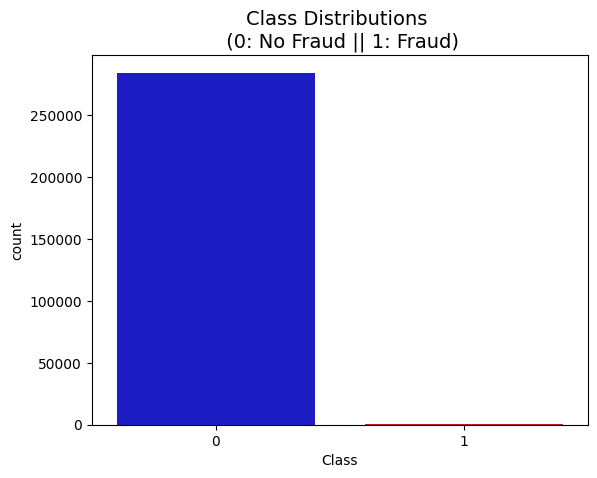

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=cc_data, x='Class', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

## STEP 4: Data Cleaning and Initializing The Model with sklearn (no undersampling) -- MILLER

### Data splitting

In [9]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# First, make a train-test split. We'll use this train-test split for all our models before we downsample.
# This splits the data into data the model is "trained" on, and validation data to test the accuracy of our model.

X_train, X_test, Y_train, Y_test = train_test_split(cc_data.iloc[:, :30], 
                                                    cc_data.iloc[:, 30],
                                                    test_size=0.3,
                                                    random_state=0)

### Data preparation and data cleaning

In [41]:
# Create a classifier purely out of just the train test split, with no undersampling
classifier = RandomForestClassifier(n_estimators=15, max_depth=3, random_state=0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=15, random_state=0)

In [42]:
# Running the test set through the model
baseline_output = classifier.predict_proba(X_test)

# Peek into a few predicted output probabilities: 
# [(probability of class 0, probability of class 1), ...]
print(baseline_output[:5])

# Grab the predicted probabilities for class 1
y_class1_pred_prob = baseline_output[:, 1]

[[9.99574326e-01 4.25674209e-04]
 [9.99574326e-01 4.25674209e-04]
 [9.99574326e-01 4.25674209e-04]
 [9.99574326e-01 4.25674209e-04]
 [9.99574326e-01 4.25674209e-04]]


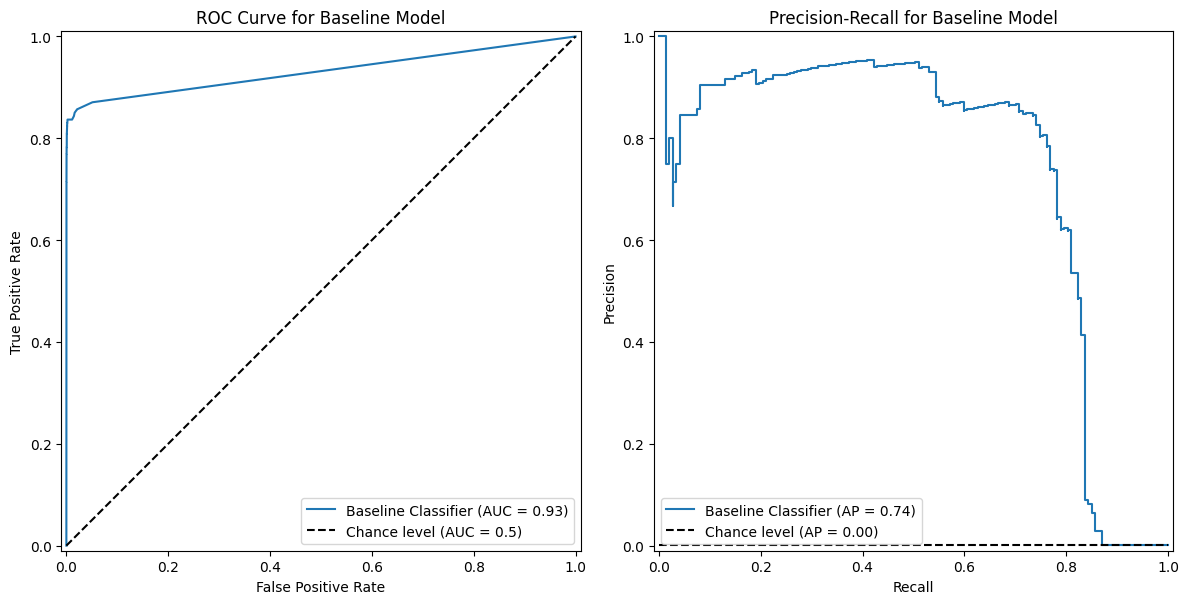

In [43]:
# Getting the False Positive and True Positive rates for later comparison
# Sklearn roc_curve documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
baseline_fpr, baseline_tpr, _ = metrics.roc_curve(Y_test, y_class1_pred_prob, pos_label=1) # pos_label specifies which class is the positive class

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the ROC Curve
metrics.RocCurveDisplay.from_predictions(
    Y_test,
    y_class1_pred_prob, 
    pos_label=1,
    name='Baseline Classifier', 
    plot_chance_level=True,
    ax=axes[0]
)
axes[0].set_title("ROC Curve for Baseline Model")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")

# Plot the Precision-Recall curve
metrics.PrecisionRecallDisplay.from_predictions(
    Y_test,
    y_class1_pred_prob,
    pos_label = 1,
    name = "Baseline Classifier",
    plot_chance_level=True,
    ax=axes[1]
)
axes[1].set_title("Precision-Recall for Baseline Model")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")

# Adjust layout and display
plt.tight_layout()
plt.show()

## STEP 4b: Evaluation with Performance Metrics -- Alyssa

## STEP 5: Undersampling Techniques -- Esther (just write the general blurb for this)

### Random Downsampling -- Esther

In [44]:
# Randomly downsample the data
X_train_randdown, Y_train_randdown = RandomUnderSampler(random_state=1).fit_resample(X_train, Y_train)

In [45]:
# First, build up a model for the random downsampler
randdown_model = RandomForestClassifier(n_estimators=29, max_depth=3, random_state=0)
randdown_model.fit(X_train_randdown, Y_train_randdown)
randdown_output = randdown_model.predict_proba(X_test)
y_class1_pred_prob_randdown = randdown_output[:, 1]

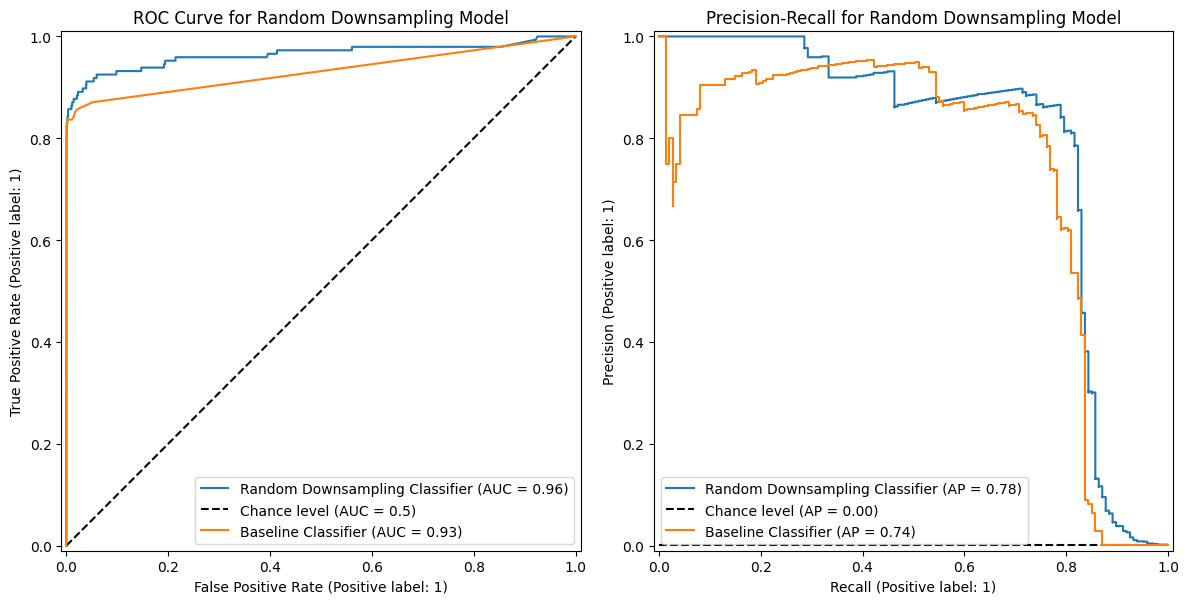

In [46]:
# Get metrics: False Positive Rate, True Positive Rate, Precision, and Recall
randdown_model_fpr, randdown_model_tpr, _ = metrics.roc_curve(Y_test, y_class1_pred_prob_randdown, pos_label=1)
randdown_model_roc_auc = metrics.auc(randdown_model_fpr, randdown_model_tpr)
randdown_model_precision, randdown_model_recall, _ = metrics.precision_recall_curve(Y_test, y_class1_pred_prob_randdown)
randdown_model_pr_auc = metrics.auc(randdown_model_recall, randdown_model_precision)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the ROC Curve
metrics.RocCurveDisplay.from_predictions(
    Y_test,
    y_class1_pred_prob_randdown, 
    pos_label=1,
    name='Random Downsampling Classifier', 
    plot_chance_level=True,
    ax=axes[0]
)
axes[0].set_title("ROC Curve for Random Downsampling Model")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")

# Plot the Precision-Recall curve
metrics.PrecisionRecallDisplay.from_predictions(
    Y_test,
    y_class1_pred_prob_randdown,
    pos_label = 1,
    name = "Random Downsampling Classifier",
    plot_chance_level=True,
    ax=axes[1]
)
axes[1].set_title("Precision-Recall for Random Downsampling Model")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")

# Plot the original data's ROC curve
metrics.RocCurveDisplay.from_predictions(
    Y_test,
    y_class1_pred_prob, 
    pos_label=1,
    name='Baseline Classifier', 
    ax=axes[0]
)

# Plot the original data's Precision-Recall curve
metrics.PrecisionRecallDisplay.from_predictions(
    Y_test,
    y_class1_pred_prob,
    pos_label = 1,
    name = "Baseline Classifier",
    ax=axes[1]
)

# Adjust layout and display
plt.tight_layout()
plt.show()

###  Near Miss Undersampling -- Ria

In [73]:
# create a new model, using the same train-test split, for Near Miss
near_miss = NearMiss()
X_train_nm, Y_train_nm = near_miss.fit_resample(X_train, Y_train)

In [120]:
# Compare dataset sizes
counter = Counter(Y_train)
total = counter[0] + counter[1]
print("Before using Near Miss Downsampling")
print("Number of data points in class 0: ", counter[0])
print("Number of data points in class 1: ", counter[1])
print("Class 0: ", round(counter[0] / total * 100, 2), "%, Class 1: ", round(counter[1] / total * 100, 2), "%")

# Compare against undersampling dataset sizes
counter = Counter(Y_train_nm)
total = counter[0] + counter[1]
print("After using Near Miss Downsampling")
print("Number of data points in class 0: ", counter[0])
print("Number of data points in class 1: ", counter[1])
print("Class 0: ", round(counter[0] / total * 100, 2), "%, Class 1: ", round(counter[1] / total * 100, 2), "%")

Before using Near Miss Downsampling
Number of data points in class 0:  199019
Number of data points in class 1:  345
Class 0:  99.83 %, Class 1:  0.17 %
After using Near Miss Downsampling
Number of data points in class 0:  345
Number of data points in class 1:  345
Class 0:  50.0 %, Class 1:  50.0 %


In [60]:
nm_model = RandomForestClassifier(n_estimators=29, max_depth=3, random_state=0)
nm_model.fit(X_train_nm, Y_train_nm)
nm_output = nm_model.predict_proba(X_test)
y_class1_pred_prob_nm = nm_output[:, 1]

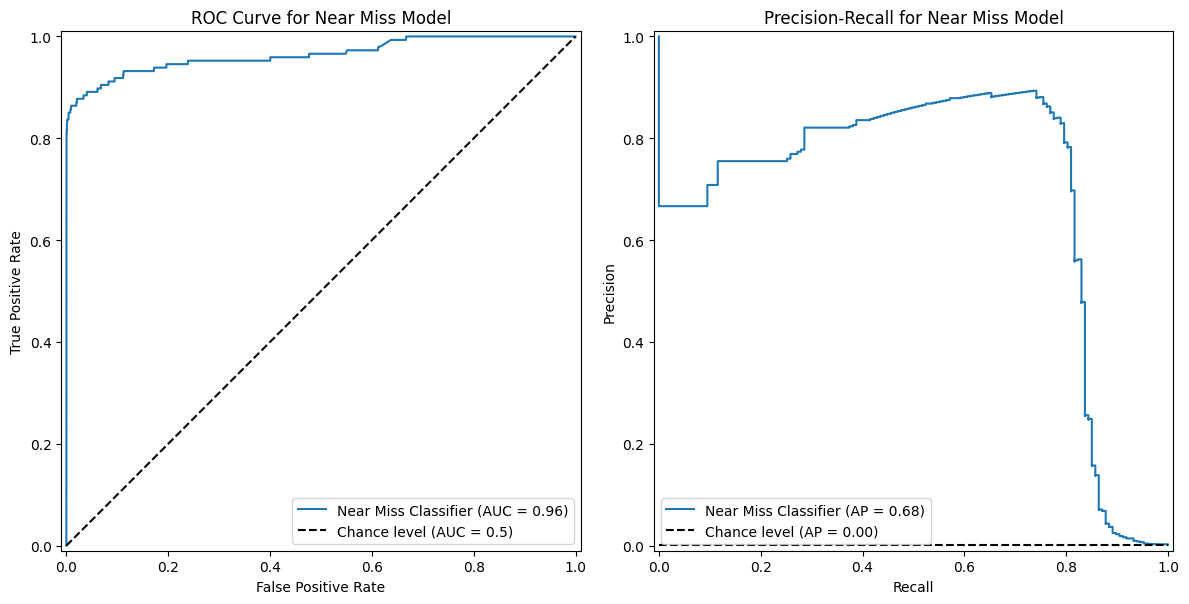

In [61]:
# Get metrics: False Positive Rate, True Positive Rate, Precision, and Recall
nm_model_fpr, nm_model_tpr, _ = metrics.roc_curve(Y_test, y_class1_pred_prob_nm, pos_label=1)
nm_model_roc_auc = metrics.auc(nm_model_fpr, nm_model_tpr)
nm_model_precision, nm_model_recall, _ = metrics.precision_recall_curve(Y_test, y_class1_pred_prob_nm)
nm_model_pr_auc = metrics.auc(nm_model_recall, nm_model_precision)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the ROC Curve
metrics.RocCurveDisplay.from_predictions(
    Y_test,
    y_class1_pred_prob_nm, 
    pos_label=1,
    name='Near Miss Classifier', 
    plot_chance_level=True,
    ax=axes[0]
)
axes[0].set_title("ROC Curve for Near Miss Model")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")

# Plot the Precision-Recall curve
metrics.PrecisionRecallDisplay.from_predictions(
    Y_test,
    y_class1_pred_prob_nm,
    pos_label = 1,
    name = "Near Miss Classifier",
    plot_chance_level=True,
    ax=axes[1]
)
axes[1].set_title("Precision-Recall for Near Miss Model")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")

# Adjust layout and display
plt.tight_layout()
plt.show()

### Tomek Link Undersampling -- Miller

In [70]:
## STEP 5: Undersampling Techniques -- Esther (just write the general blurb for this)

### Random Downsampling -- Esther

In [12]:
fraud_df = cc_data.loc[cc_data['Class'] == 1]
non_fraud_df = cc_data.loc[cc_data['Class'] == 0][:492]
display(fraud_df.head())
display(non_fraud_df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Spam and Ham Stuff


/var/folders/ql/480bqgd56wz4x3b25hcy0bhr0000gn/T/ipykernel_78714/637254935.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cc_data, x='Class', palette=colors)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

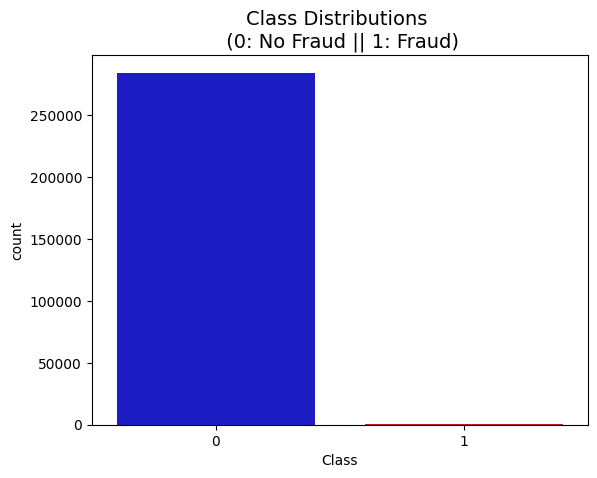

In [13]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(data=cc_data, x='Class', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
data['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

/Users/edakavlakoglu/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edakavlakoglu/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edakavlakoglu/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


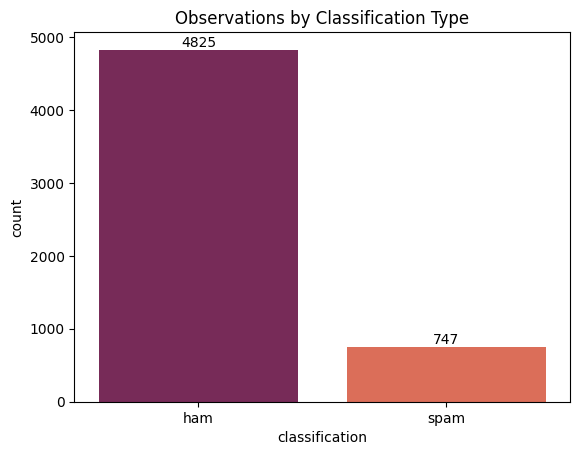

In [ ]:
# Explore distribution of dataset 

# count plot on single categorical variable
ax = sns.countplot(x = cc_data['classification'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

Note: Distribution of dataset indicates imbalanced data.

In [ ]:
# Dropping all duplicate texts based off of results of EDA
df_no_dup = data.drop_duplicates(subset=['text'], keep='first')

/Users/edakavlakoglu/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edakavlakoglu/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/edakavlakoglu/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


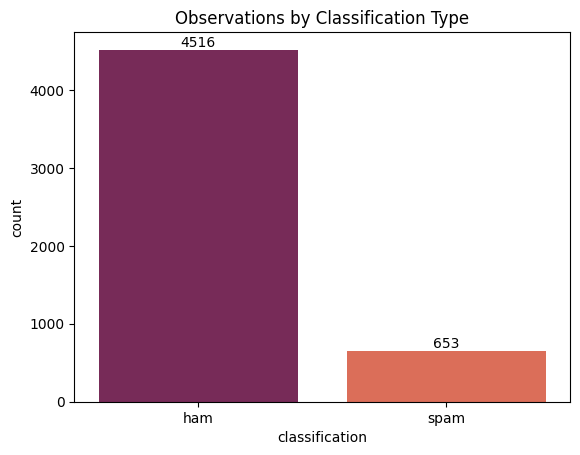

In [ ]:
# Explore distribution of dataset 

# count plot on single categorical variable
ax = sns.countplot(x = df_no_dup['classification'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

###  Near Miss Undersampling -- Ria

### Tomek Link Undersampling -- Miller